<a href="https://colab.research.google.com/github/Dennieeeee/Medical-Cost-and-Diseases/blob/master/Healthcare_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
test = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/Medical-Cost-and-Diseases/master/Data/Healthcare%20Insurance/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/Medical-Cost-and-Diseases/master/Data/Healthcare%20Insurance/train.csv')

In [3]:
df = pd.concat([test,train])

In [4]:
test.shape

(127037, 11)

In [5]:
train.shape

(381109, 12)

In [6]:
df.shape

(508146, 12)

In [7]:
test.shape[0] + train.shape[0]

508146

In [8]:
df.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.4+ MB


In [10]:
# Response is only in train dataset so
df.isnull().sum()


id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [11]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [12]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Data Preprocessing
- train is the original dataset.
- train2 is the preprocessed version.

In [13]:
num_feat = [x.lower() for x in ['Age','Vintage']]
cat_feat = [x.lower() for x in ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
                                'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']]

In [14]:
train2 = train.copy()

In [15]:
train2['Gender'] = train2['Gender'].map({'Female': 0, 'Male': 1} ).astype(int)

In [16]:
train2=pd.get_dummies(train2,drop_first=True)

In [17]:
# change all column names to lower case
train2.rename(columns=lambda x:x.lower(), inplace=True)
train.rename(columns=lambda x:x.lower(), inplace=True)

In [18]:
train2.head()

,id,gender,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response,vehicle_age_< 1 year,vehicle_age_> 2 years,vehicle_damage_yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [19]:
# lt: less than
# gt: greater than
train2 = train2.rename(columns={"vehicle_age_< 1 year": "vehicle_age_lt_1_year", 
                            "vehicle_age_> 2 years": "vehicle_age_gt_2_years"})

In [20]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      381109 non-null  int64  
 1   gender                  381109 non-null  int64  
 2   age                     381109 non-null  int64  
 3   driving_license         381109 non-null  int64  
 4   region_code             381109 non-null  float64
 5   previously_insured      381109 non-null  int64  
 6   annual_premium          381109 non-null  float64
 7   policy_sales_channel    381109 non-null  float64
 8   vintage                 381109 non-null  int64  
 9   response                381109 non-null  int64  
 10  vehicle_age_lt_1_year   381109 non-null  uint8  
 11  vehicle_age_gt_2_years  381109 non-null  uint8  
 12  vehicle_damage_yes      381109 non-null  uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 30.2 MB


In [21]:
# convert all uint8 variables to integer
train2['vehicle_age_lt_1_year']=train2['vehicle_age_lt_1_year'].astype('int')
train2['vehicle_age_gt_2_years']=train2['vehicle_age_gt_2_years'].astype('int')
train2['vehicle_damage_yes']=train2['vehicle_damage_yes'].astype('int')

In [22]:
'''
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['annual_premium']] = mm.fit_transform(train[['annual_premium']])

'''

"\nfrom sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler\nss = StandardScaler()\ntrain[num_feat] = ss.fit_transform(train[num_feat])\n\n\nmm = MinMaxScaler()\ntrain[['annual_premium']] = mm.fit_transform(train[['annual_premium']])\n\n"

In [23]:
#train = train.drop('id',axis=1)

In [24]:
train.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

# EDA

In [25]:
train.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


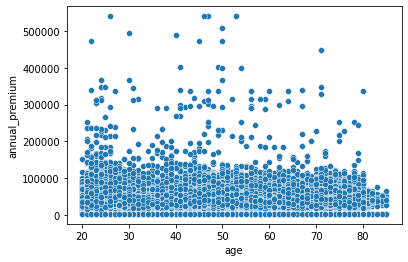

In [26]:
sns.scatterplot('age', 'annual_premium', data=train)

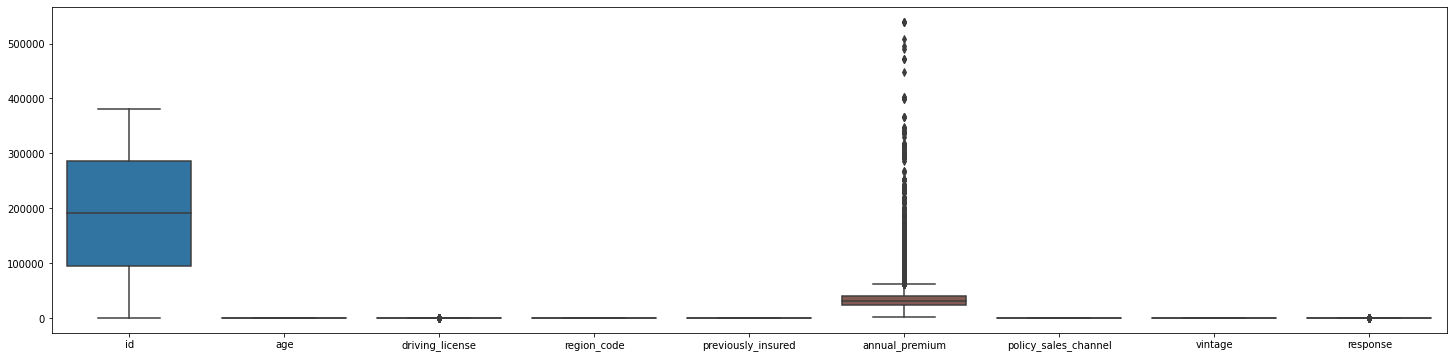

In [27]:
plt.figure(figsize=(25,6))
sns.boxplot(data=train)

From the boxplot above, we can see annual premium has a lot of outliers.
Let's remove it.

In [28]:
train = train[train['annual_premium'] < 60000]

In [29]:
train.shape

(368949, 12)

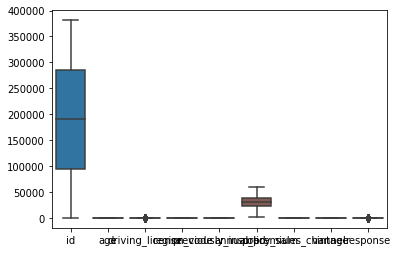

In [30]:
sns.boxplot(data=train)

### Age

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


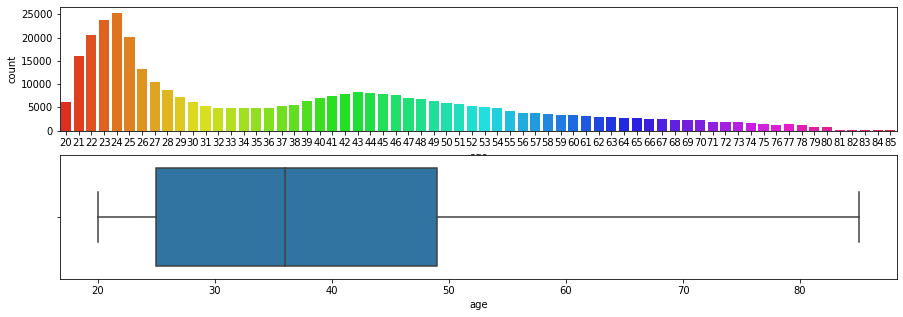

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.countplot(train['age'], palette = 'hsv')

plt.subplot(2,1,2)
sns.boxplot(train['age'])

Age and Annual Premium
- How much does people in different age pay to be as premium

In [32]:
df = train.groupby(['age','gender'])['annual_premium'].sum().to_frame()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


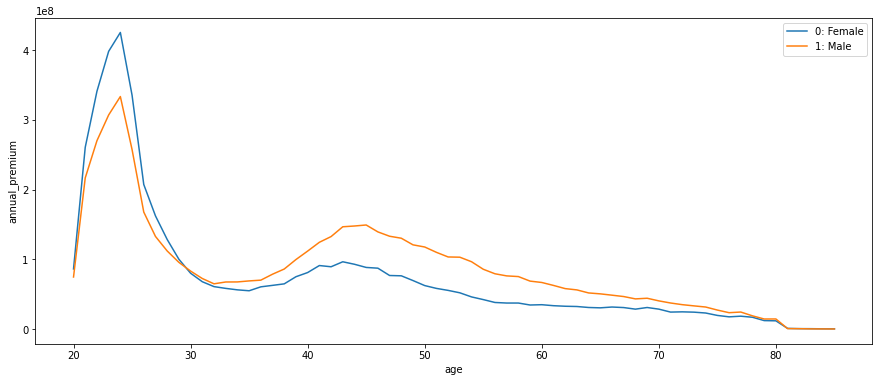

In [33]:
plt.figure(figsize=(15,6))
sns.lineplot('age', 'annual_premium', data=df, hue='gender')
plt.legend(['0: Female', '1: Male'])

Age and Vintage
- Number of days that customers in different age have been associated with the company.

In [34]:
df = train.groupby(['age','gender'])['vintage'].sum().to_frame()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


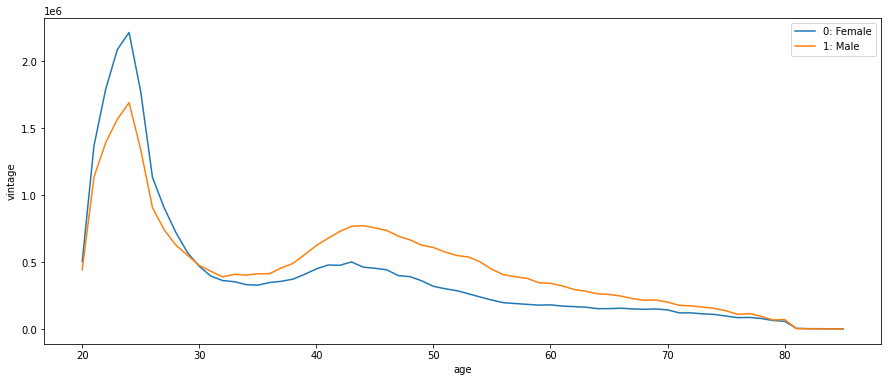

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot('age', 'vintage', data=df, hue='gender')
plt.legend(['0: Female', '1: Male'])

### Gender

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


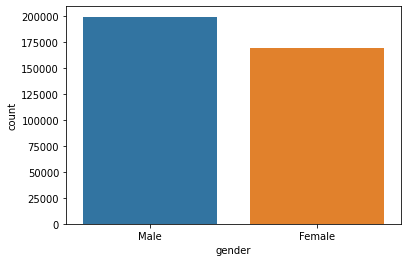

In [36]:
# 1:male; 0: female
sns.countplot(train['gender'])

Gender and Response

In [37]:
df=train.groupby(['gender','response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

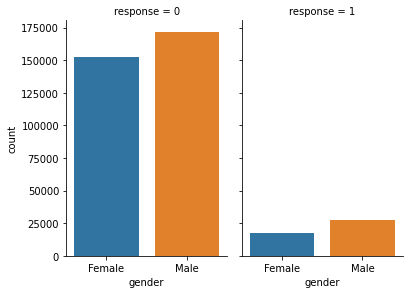

In [38]:
sns.catplot(x='gender', y='count', col='response', data=df, kind='bar',
            height=4, aspect = 0.7)


Gender and Previously Insured

In [39]:
df = train.groupby(['gender','previously_insured'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

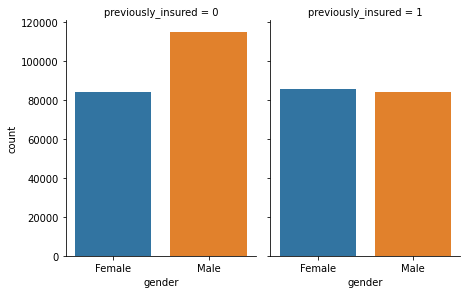

In [40]:
sns.catplot(x='gender',y='count', col='previously_insured', data=df, kind='bar',
            height=4, aspect = 0.8)


### Driving License
- From plots below, we can see that most of customers who are interested in insurance all have DL. And, customers have their driver's license is 99%.

Percentage of  Driving_License feature
 
1    99.796178
0     0.203822
Name: driving_license, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


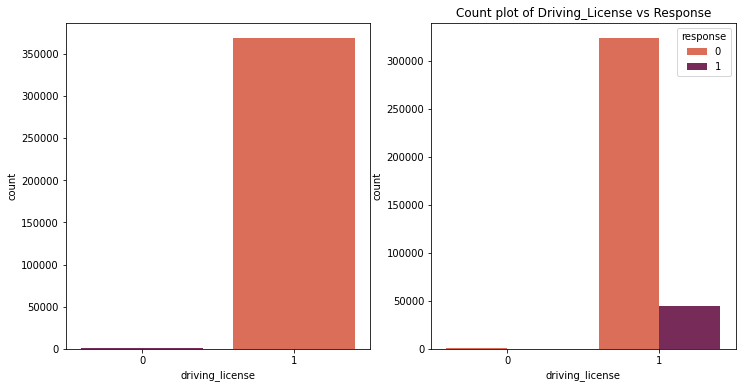

In [41]:
print("Percentage of  Driving_License feature\n ")
print(train['driving_license'].value_counts()/len(train)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
sns.countplot(train['driving_license'],ax = axx[0],palette = 'rocket')
sns.countplot('driving_license', hue = 'response',ax =axx[1],data = train,palette="rocket_r")

### Region Code

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


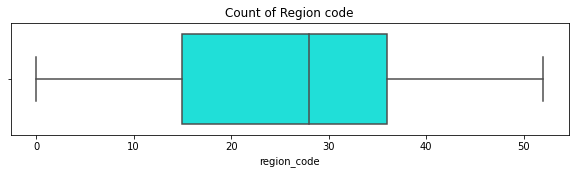

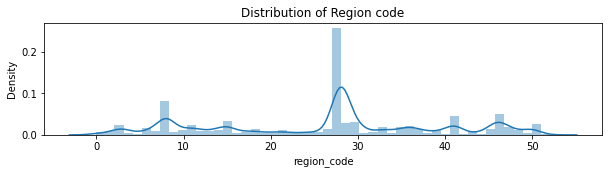

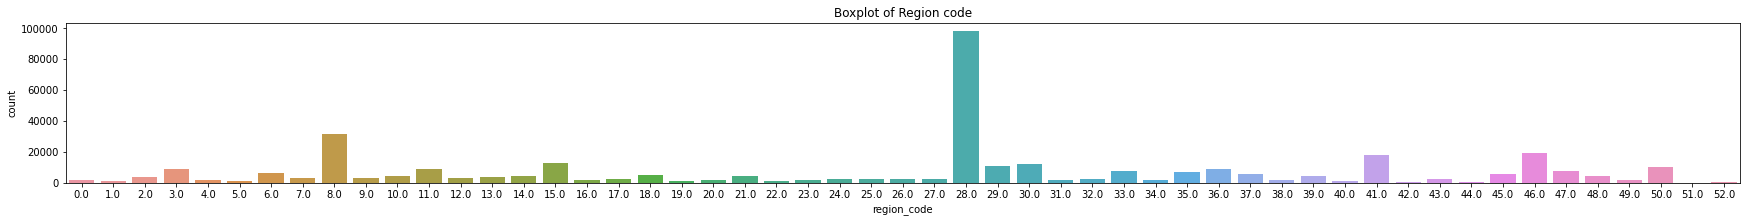

In [42]:
plt.figure(figsize = (10,7))
plt.subplot(3,1,1)
sns.boxplot(train['region_code'], palette = 'hsv')
plt.title('Count of Region code')


plt.figure(figsize = (10,7))
plt.subplot(3,1,2)
sns.distplot(train['region_code'])
plt.title('Distribution of Region code')

plt.figure(figsize = (30,10))
plt.subplot(3,1,3)
sns.countplot(train['region_code'])
plt.title('Boxplot of Region code')
plt.show()


### Vehicle Age and Response

count customers whose vehicle age is less than 1 year and greater than 2 years.
- Within those less than 1 year, majority is not less than 1 year.
- Within those greater than 2 years, majority is not greater than 2 years.
- Which means majority are between 1 and 2 years.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


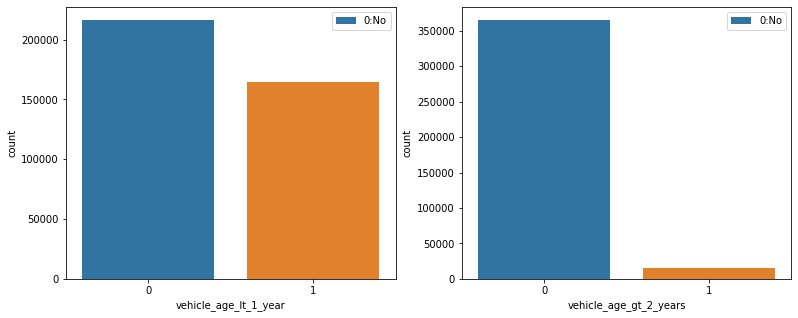

In [43]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot('vehicle_age_lt_1_year', data=train2)
plt.legend(['0:No','1:Yes'])

plt.subplot(1,2,2)
sns.countplot('vehicle_age_gt_2_years', data=train2)
plt.legend(['0:No','1:Yes'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


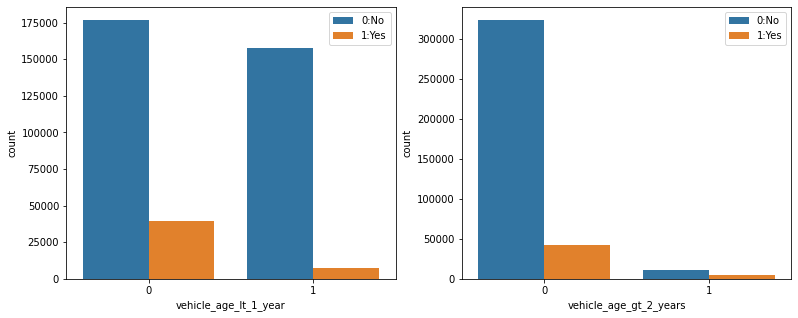

In [44]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot('vehicle_age_lt_1_year', hue='response',data=train2)
plt.legend(['0:No','1:Yes'])

plt.subplot(1,2,2)
sns.countplot('vehicle_age_gt_2_years', hue='response', data=train2)
plt.legend(['0:No','1:Yes'])


From the first plot below on the left, we can tell most of age of vehicle is not greater than 2 years. Most of customers aren't intersted; however, customers with 1 - 2 year of vehicle age are most likely to be interested.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


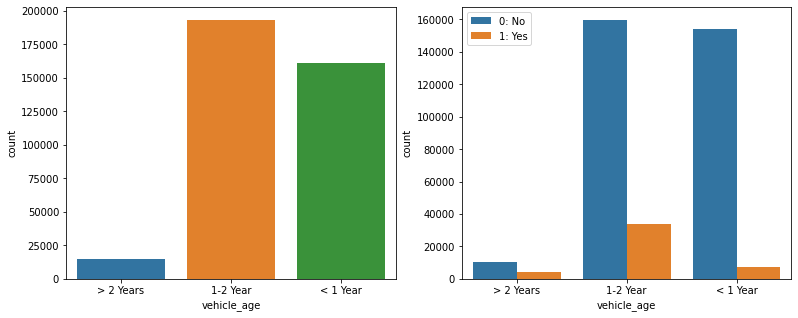

In [45]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot('vehicle_age', data=train)

plt.subplot(1,2,2)
sns.countplot('vehicle_age', hue='response',data=train)
plt.legend(['0: No', '1: Yes'])

### Previously Insured and Response
Most of customers were not previously insured. However, customers who were not previously insured are more likely to puchase the insurance.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


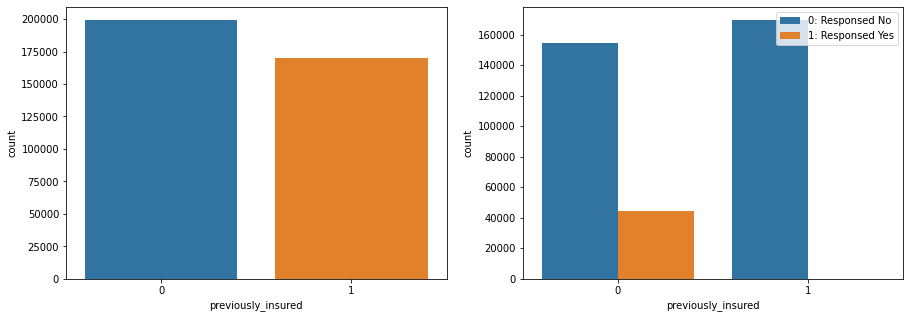

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot('previously_insured', data=train)

plt.subplot(1,2,2)
sns.countplot('previously_insured', hue='response',data=train)
plt.legend(['0: Responsed No', '1: Responsed Yes'])

### Vehicle Damage and Response
Customers that had vehicle damage yes and no are about the same. Customers with vehicle damage are more likely to purchase insurance.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


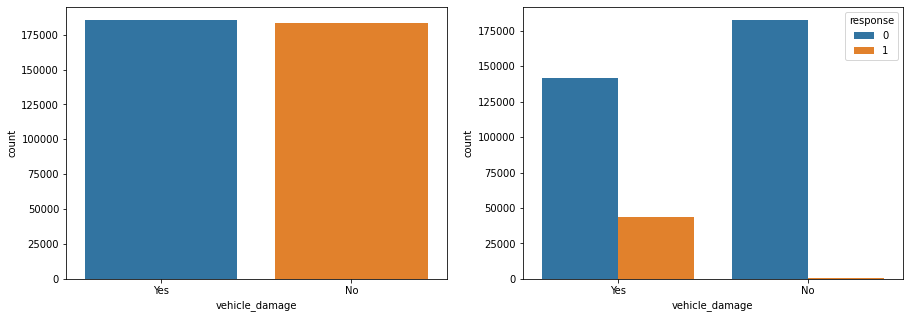

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot('vehicle_damage',data=train)

plt.subplot(1,2,2)
sns.countplot('vehicle_damage',data=train, hue='response')

### Heat Map

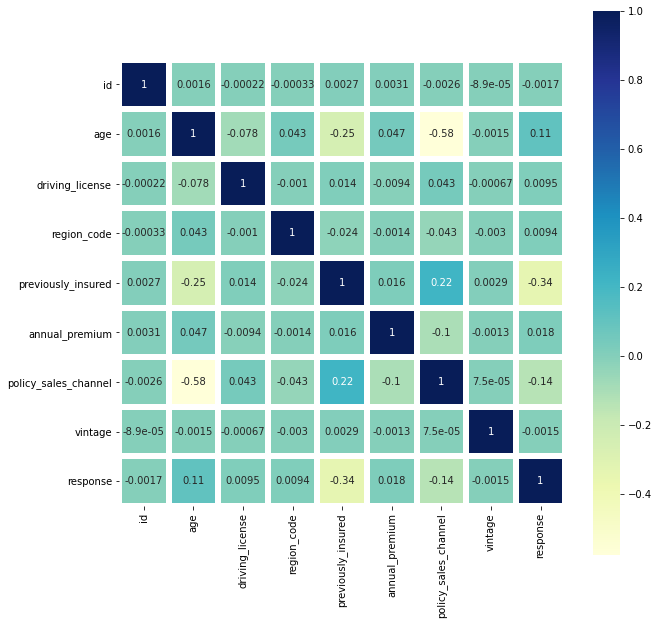

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, square=True, linewidths=5,
            annot_kws={'size': 10}, cmap='YlGnBu')

#annot_kws={'size': 10} - font size of the numbers            

Strong negative correlation between previously insured variable and customer's response.

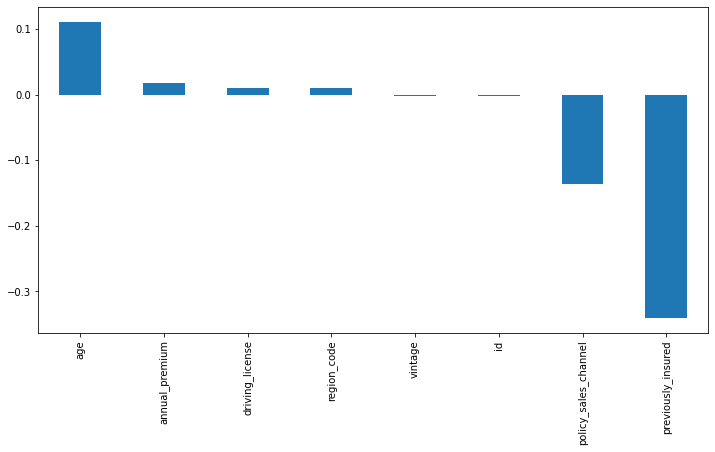

In [49]:
plt.figure(figsize=(12,6))
train.corr()['response'].drop('response').sort_values(ascending=False).plot(kind='bar')